# Heart Disease - UCI

<img src="img/uci_heart_disease.png" align="center" width="60%">

# Contexto

Este banco de dados contém 76 atributos, mas todos os experimentos publicados referem-se ao uso de um subconjunto de 14 deles. Em particular, o banco de dados de Cleveland é o único que tem sido usado por pesquisadores do ML até esta data. O campo "meta" refere-se à presença de doença cardíaca no paciente. É um inteiro valorizado de 0 (sem presença) a 4.

Para acesso à página original [clique aqui](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

# Desafio 3

A ideia é a utilização dos algoritmos de _Clusterização_ vistos neste módulo e entender como eles trabalham no agrupamento dos dados. Teoricamente, o algoritmo deve classificar os dados de acordo com as variáveis explicativas, então será possível medir a precisão das classificações. Caso seja feita uma redução de dimensão, também temos a possibilidade de identificar visualmente estas separações, além de calcular uma matriz de confusão. Ainda, pode ser utilizado algoritmos que definem sozinhos os números de clusters, permitindo uma comparação com os grupos reais. A partir disso, não temos a prioridade de trabalhaar com a definição de cada variável explicativa (nome da coluna de dados), mas sim como os algoritmos de _Clusterização_ se comportam com o DataSet.

Attribute Information:

Only 14 attributes used: 
1. #3 (age) - age in years
2. #4 (sex)  - (1 = male; 0 = female)

3. #9 (cp) - chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
        
4. #10 (trestbps) - resting blood pressure (in mm Hg on admission to the hospital)
5. #12 (chol)  - serum cholestoral in mg/dl
6. #16 (fbs) - (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)

7. #19 (restecg) - esting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
        
8. #32 (thalach) - maximum heart rate achieved
9. #38 (exang) - exercise induced angina (1 = yes; 0 = no)
10. #40 (oldpeak) - ST depression induced by exercise relative to rest

11. #41 (slope) - the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
        
12. #44 (ca) - number of major vessels (0-3) colored by flourosopy

13. #51 (thal) - 3 = normal; 6 = fixed defect; 7 = reversable defect
14. #58 (num) (the predicted attribute) - diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D 
plt.rcParams['figure.figsize'] = (16, 10)

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix

In [2]:
colNames = ('age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num')

In [3]:
cleveland = pd.read_csv('data/processed.cleveland.data', encoding = 'ascii' , header = None, names = colNames)
cleveland.shape

(303, 14)

In [4]:
cleveland.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Exploratory data analysis

In [5]:
cleveland.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [6]:
cleveland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null object
thal        303 non-null object
num         303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [7]:
cleveland.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


CPU times: user 14.4 s, sys: 133 ms, total: 14.5 s
Wall time: 14.7 s


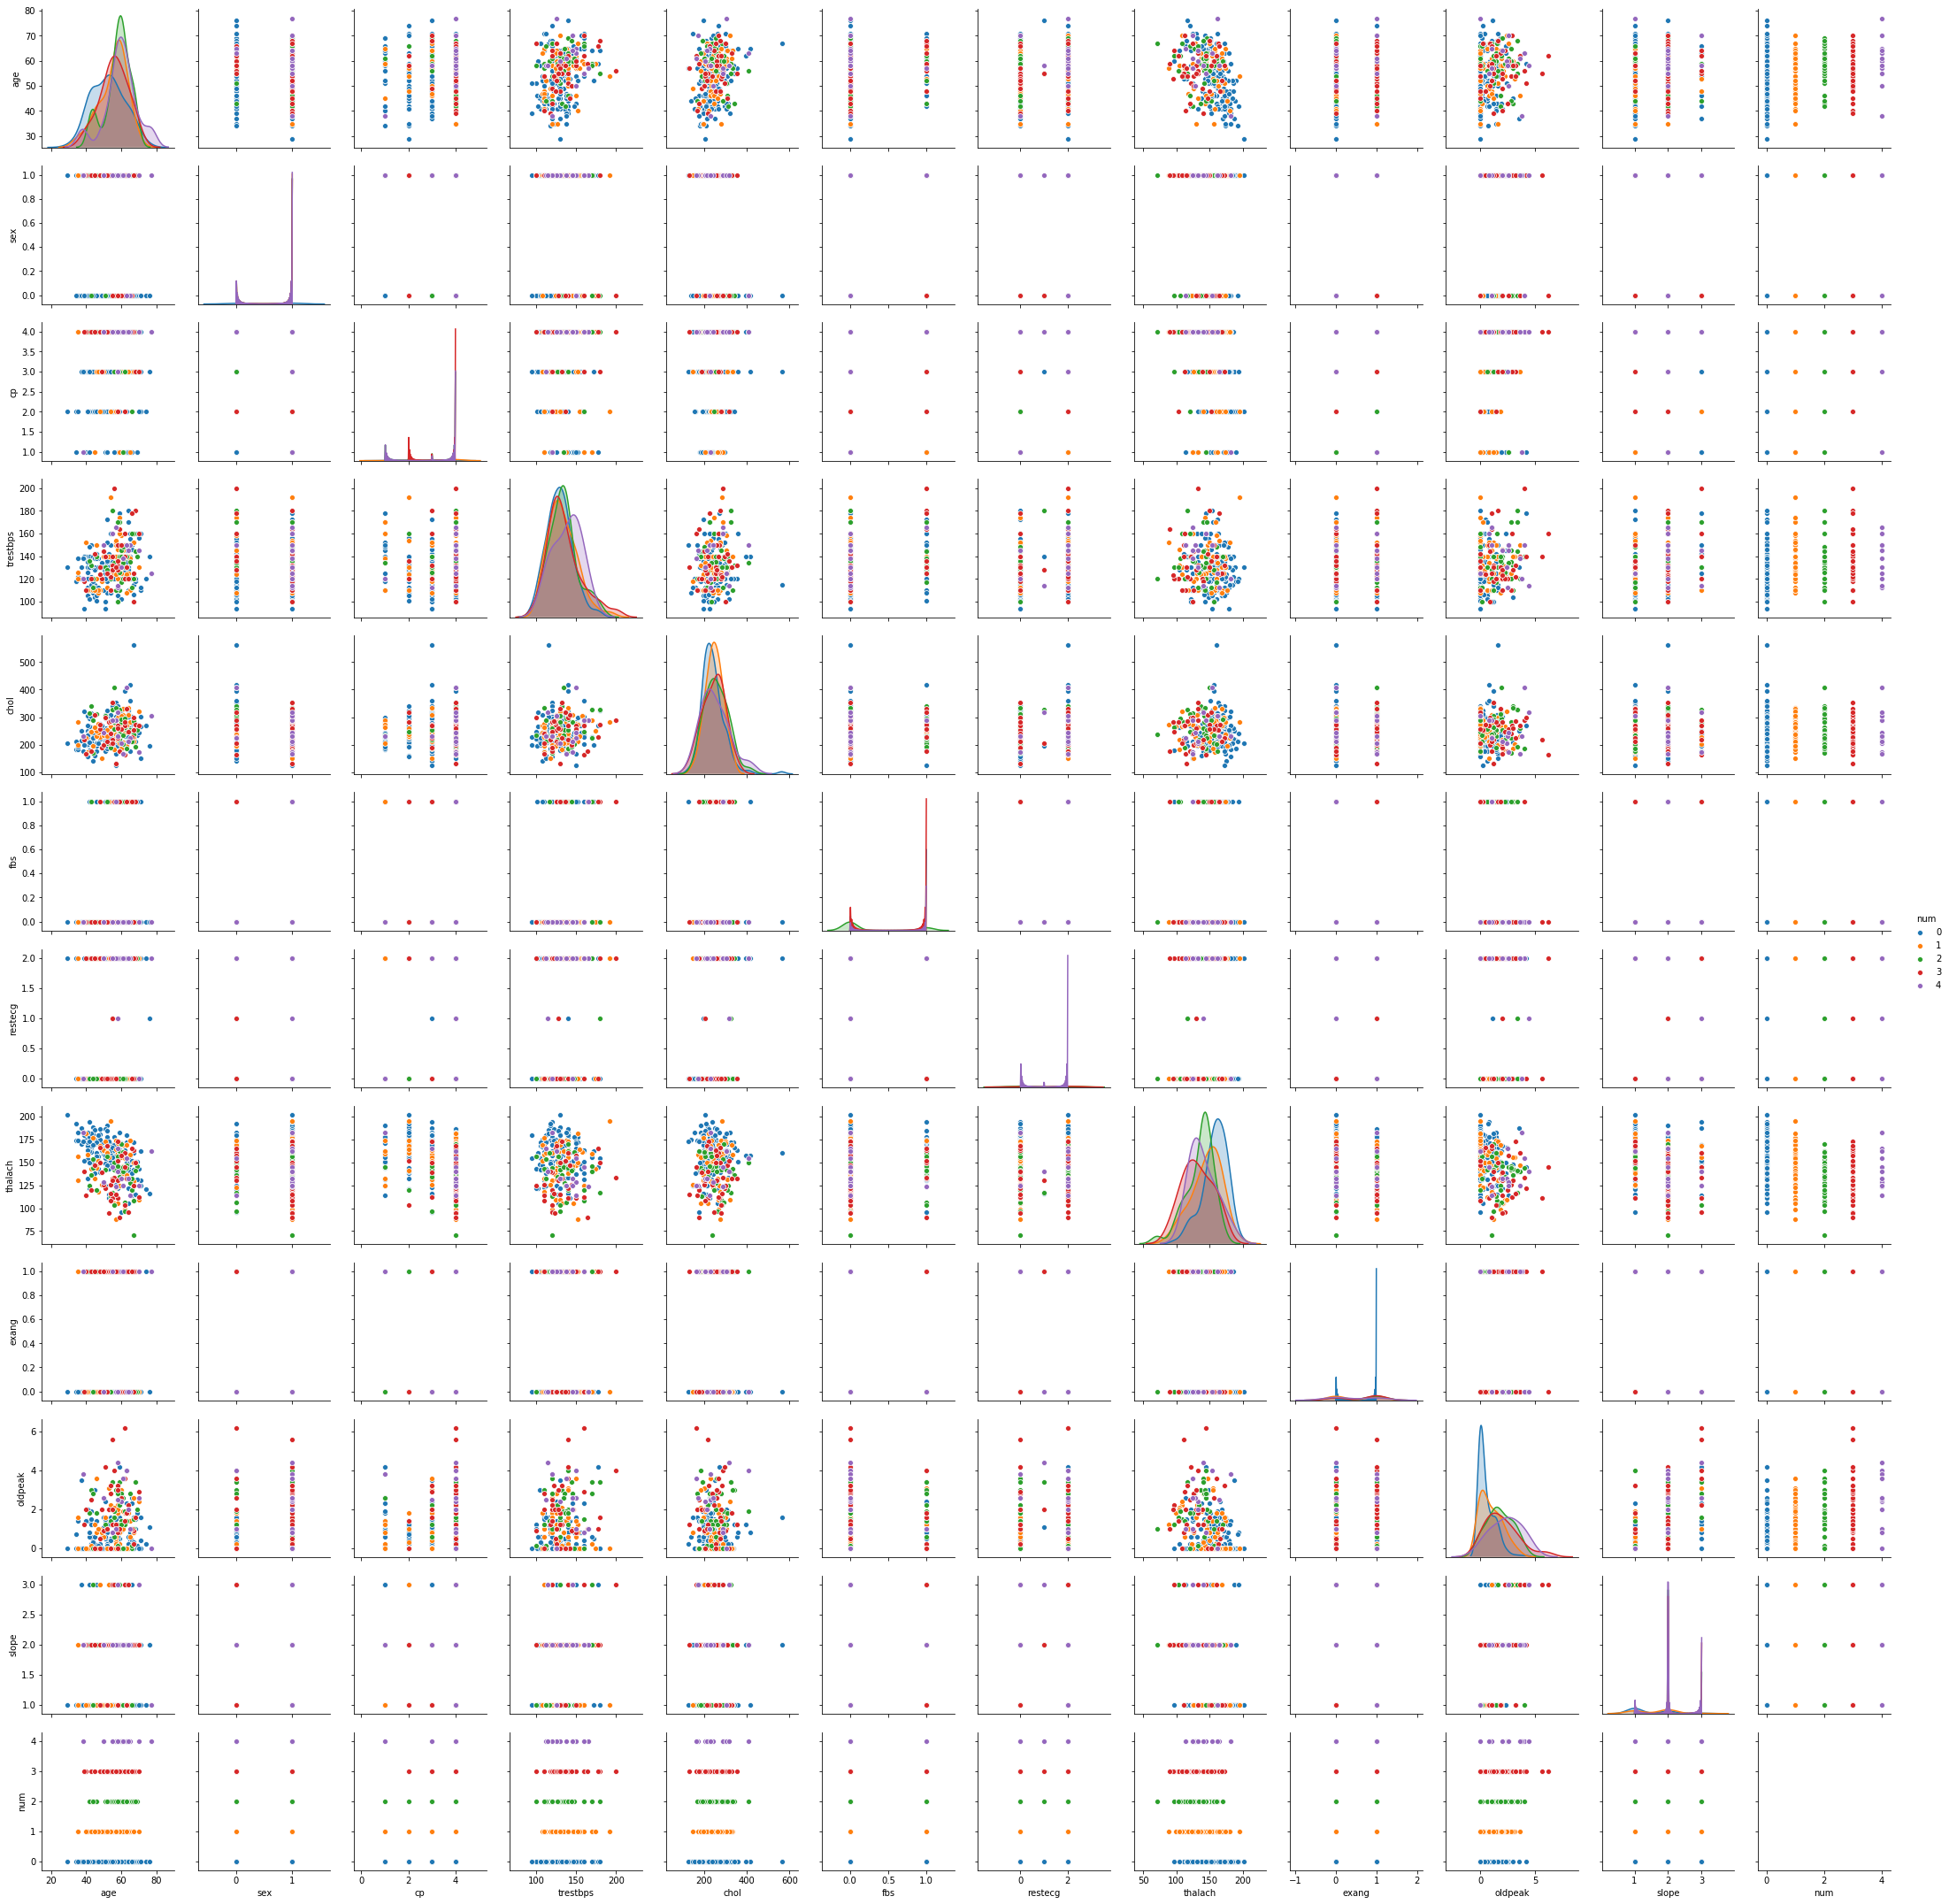

In [8]:
%%time
## Overview das features. 
sns.pairplot(cleveland, hue= 'num')

CPU times: user 12.9 s, sys: 193 ms, total: 13.1 s
Wall time: 13.6 s


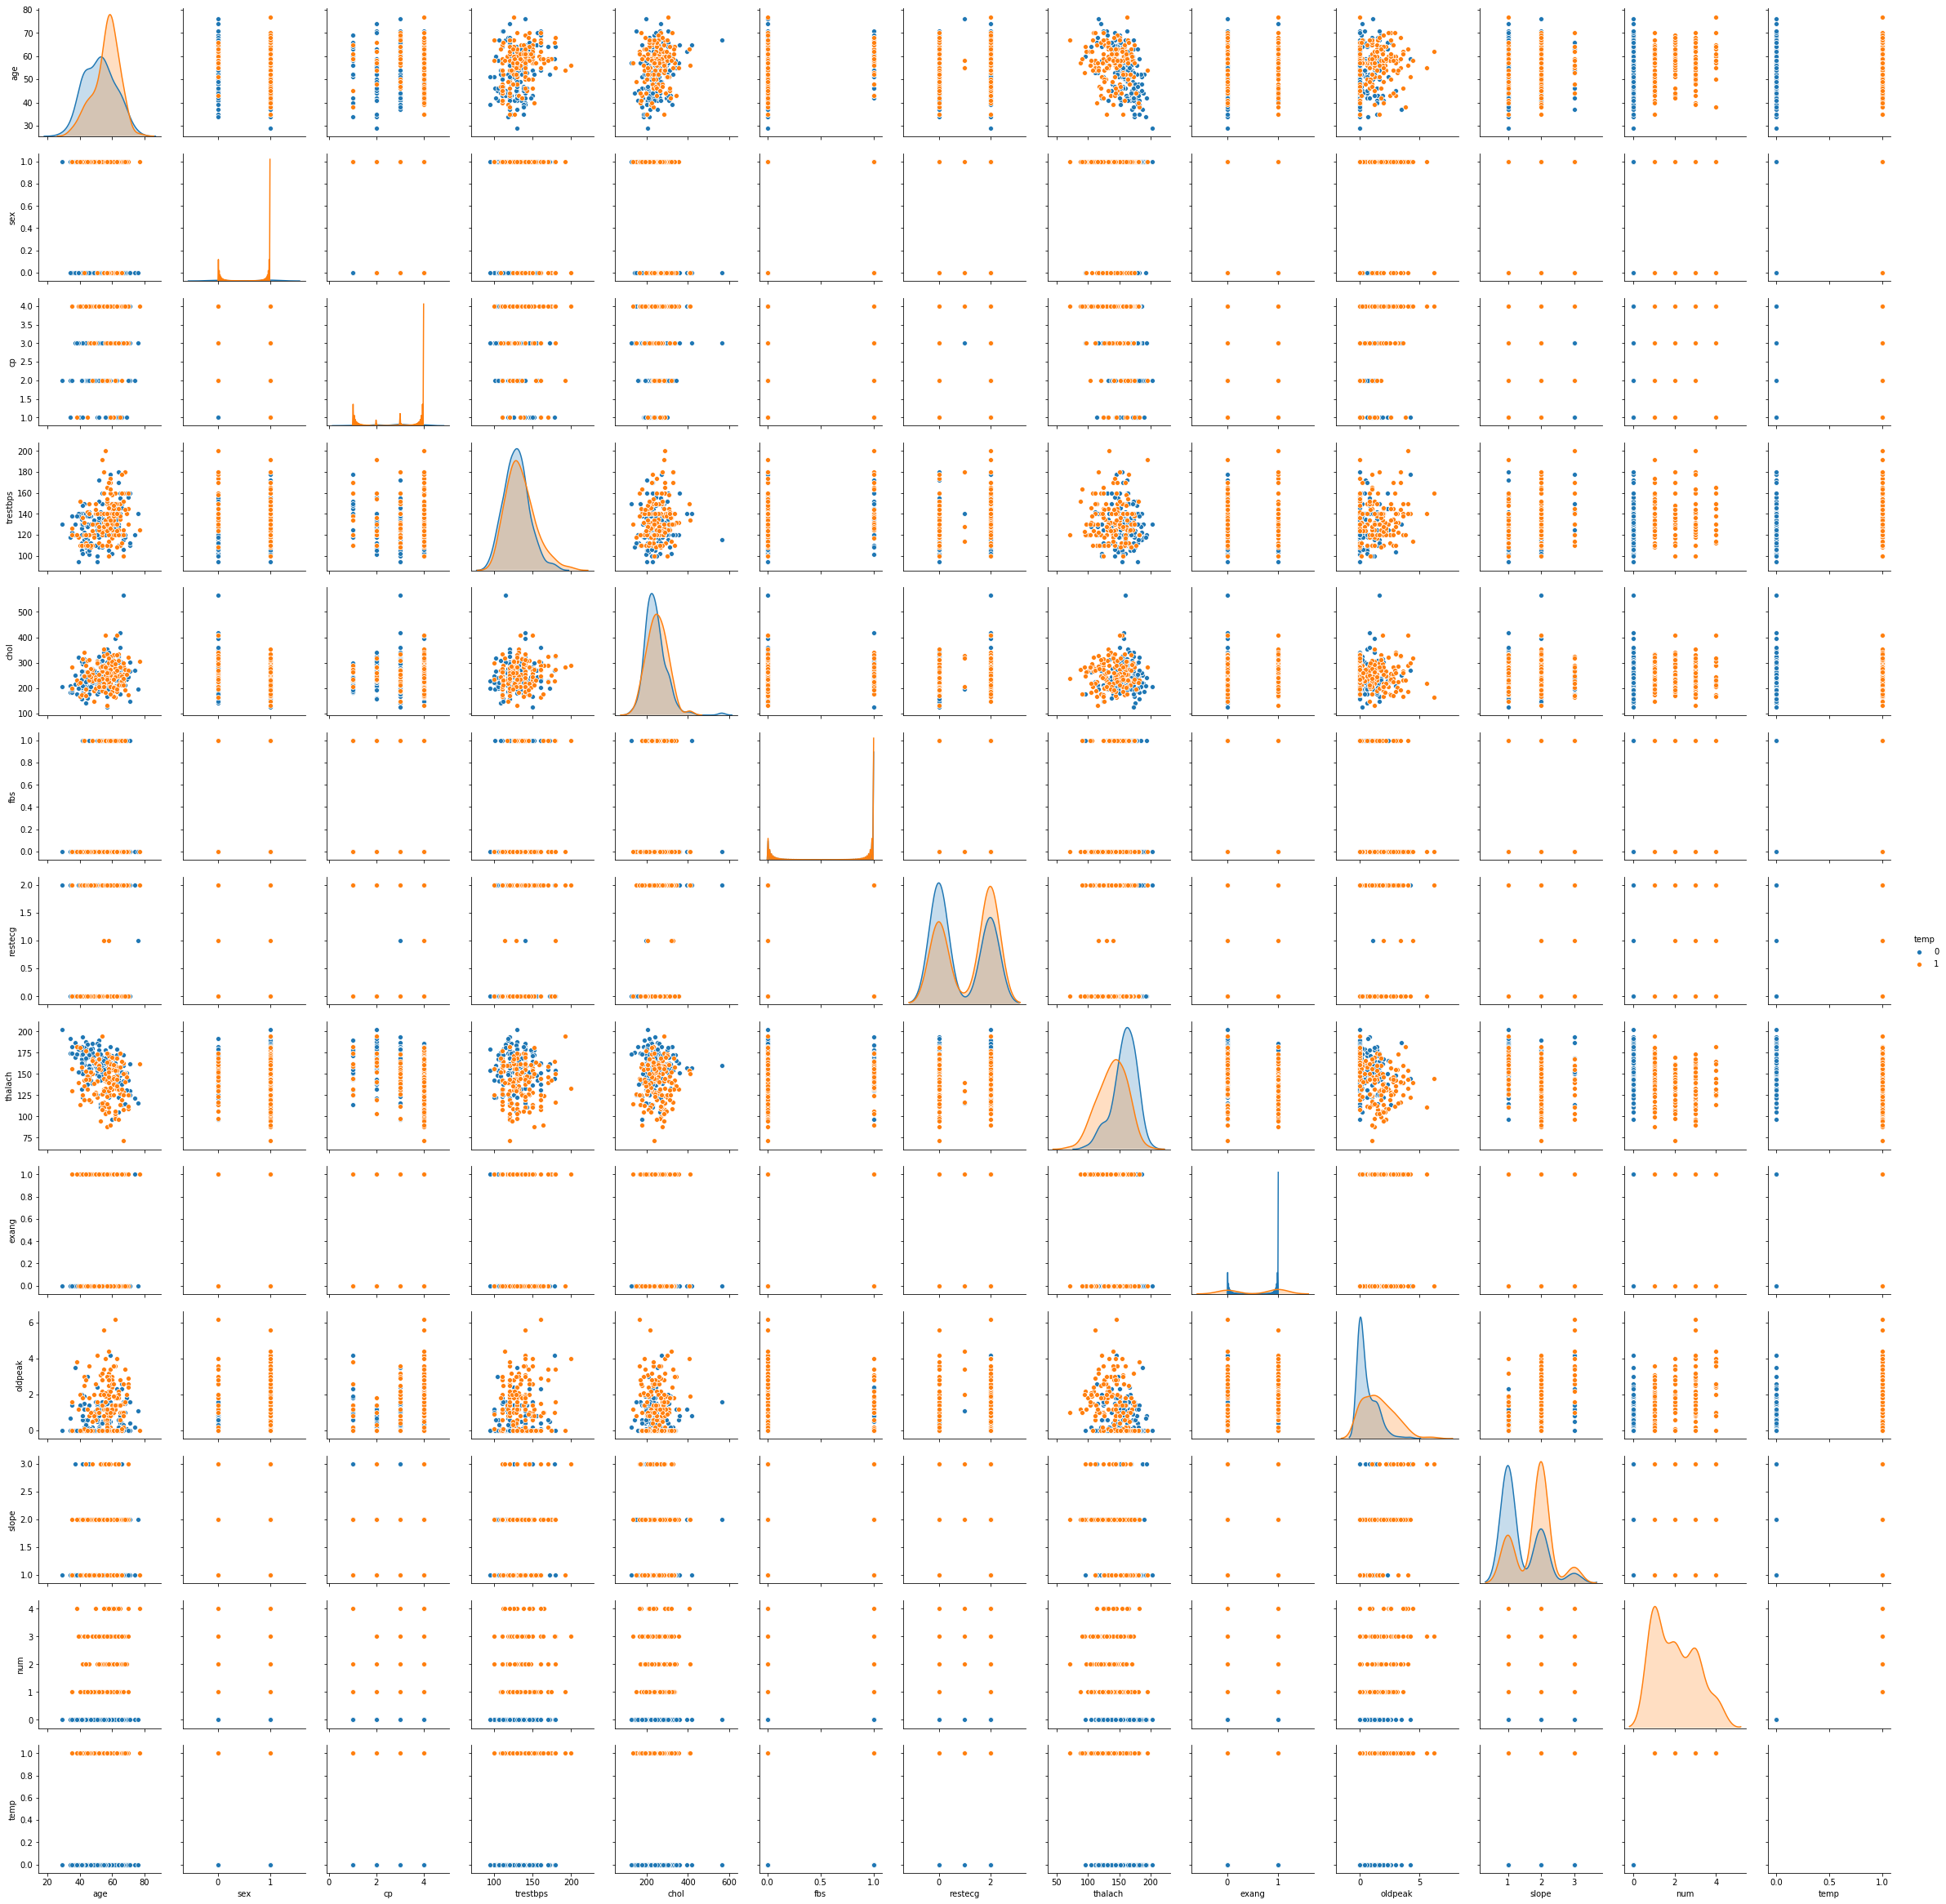

In [9]:
%%time
## Overview das features alterando a features target sendo 1 existe presença da doença (qualquer valor maior que zero)
## e 0 não existe presença de doença

cleveland['temp'] = np.where(cleveland['num']> 0,1,0)
sns.pairplot(cleveland, hue= 'temp')

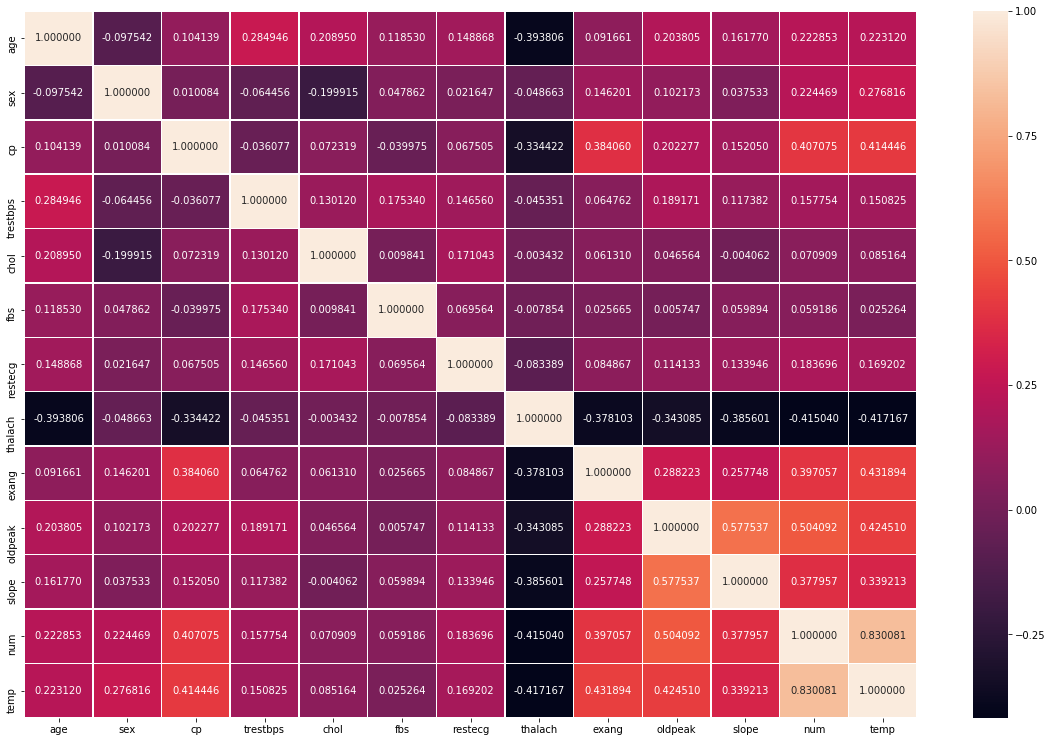

In [10]:
## Observação da correlação entre as features.

f, ax = plt.subplots(figsize=(20, 13))
sns.heatmap(cleveland.corr(), annot=True, fmt="f", linewidths=.5, ax=ax)

In [11]:
corr = cleveland.corr()
corr[11:12]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num,temp
num,0.222853,0.224469,0.407075,0.157754,0.070909,0.059186,0.183696,-0.41504,0.397057,0.504092,0.377957,1.0,0.830081


In [12]:
cleveland.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,temp
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


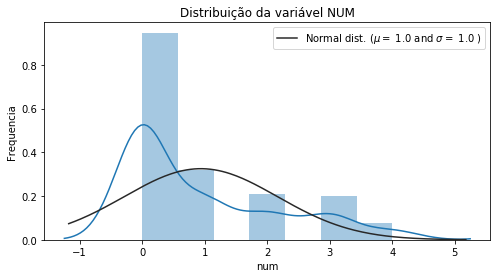

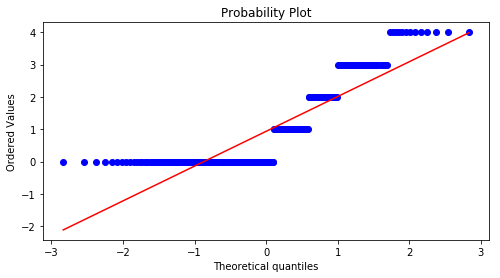

CPU times: user 428 ms, sys: 21.8 ms, total: 450 ms
Wall time: 528 ms


In [13]:
%%time
# Dando uma olhada no comportamento da variável target

plt.figure(figsize=(8,4))
sns.distplot(cleveland['num'], fit=stats.norm);

(mu, sigma) = stats.norm.fit(cleveland['num']) # para calcular a média e o desvio-padrão
plt.legend([f'Normal dist. ($\mu=$ {round(mu,0)} and $\sigma=$ {round(sigma,0)} )'],loc='best')
plt.ylabel('Frequencia')
plt.title('Distribuição da variável NUM')

fig = plt.figure(figsize=(8,4))
res = stats.probplot(cleveland['num'], plot=plt)

plt.show()

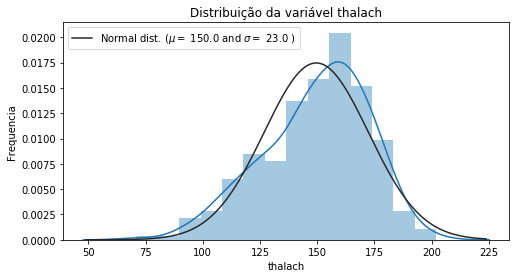

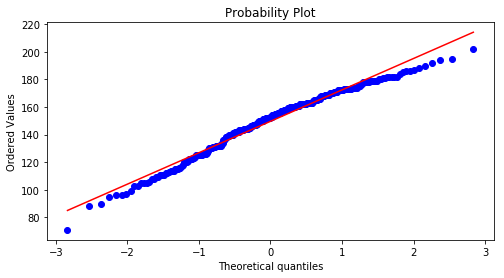

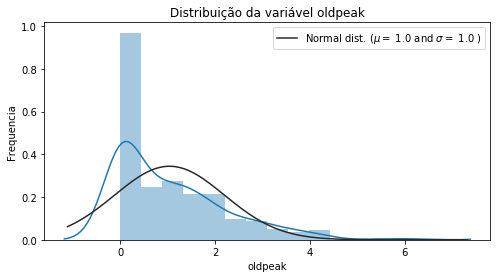

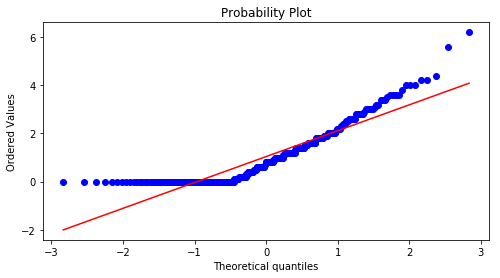

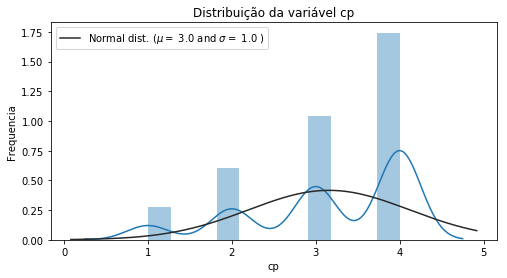

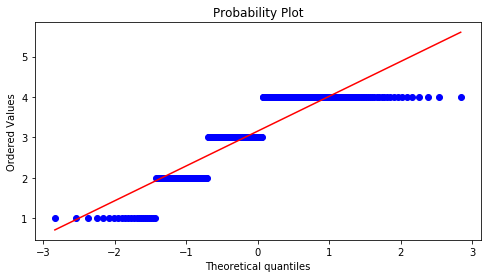

CPU times: user 999 ms, sys: 34.6 ms, total: 1.03 s
Wall time: 1.06 s


In [14]:
%%time
# Dando uma olhada no comportamento das features mais correlacionadas

plt.figure(figsize=(8,4))
sns.distplot(cleveland['thalach'], fit=stats.norm);
(mu, sigma) = stats.norm.fit(cleveland['thalach']) # para calcular a média e o desvio-padrão
plt.legend([f'Normal dist. ($\mu=$ {round(mu,0)} and $\sigma=$ {round(sigma,0)} )'],loc='best')
plt.ylabel('Frequencia')
plt.title('Distribuição da variável thalach')

fig = plt.figure(figsize=(8,4))
res = stats.probplot(cleveland['thalach'], plot=plt)


plt.figure(figsize=(8,4))
sns.distplot(cleveland['oldpeak'], fit=stats.norm);
(mu, sigma) = stats.norm.fit(cleveland['oldpeak']) # para calcular a média e o desvio-padrão
plt.legend([f'Normal dist. ($\mu=$ {round(mu,0)} and $\sigma=$ {round(sigma,0)} )'],loc='best')
plt.ylabel('Frequencia')
plt.title('Distribuição da variável oldpeak')

fig = plt.figure(figsize=(8,4))
res = stats.probplot(cleveland['oldpeak'], plot=plt)


plt.figure(figsize=(8,4))
sns.distplot(cleveland['cp'], fit=stats.norm);
(mu, sigma) = stats.norm.fit(cleveland['cp']) # para calcular a média e o desvio-padrão
plt.legend([f'Normal dist. ($\mu=$ {round(mu,0)} and $\sigma=$ {round(sigma,0)} )'],loc='best')
plt.ylabel('Frequencia')
plt.title('Distribuição da variável cp')

fig = plt.figure(figsize=(8,4))
res = stats.probplot(cleveland['cp'], plot=plt)

plt.show()

In [15]:
# Visualizando o balancamento do dataset sob a pespertiva da feature target
cleveland.groupby('num').count()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,temp
num,,,,,,,,,,,,,,
0,164,164,164,164,164,164,164,164,164,164,164,164,164,164
1,55,55,55,55,55,55,55,55,55,55,55,55,55,55
2,36,36,36,36,36,36,36,36,36,36,36,36,36,36
3,35,35,35,35,35,35,35,35,35,35,35,35,35,35
4,13,13,13,13,13,13,13,13,13,13,13,13,13,13


In [16]:
# Visualizando o balancamento do dataset sob a pespertiva da feature target simplificada
cleveland.groupby('temp').count()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
temp,,,,,,,,,,,,,,
0,164,164,164,164,164,164,164,164,164,164,164,164,164,164
1,139,139,139,139,139,139,139,139,139,139,139,139,139,139


### Feature engineering

In [17]:
cleveland_t1 = cleveland

In [18]:
cleveland_t1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,temp
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


In [19]:
cleveland_t1['temp'] = np.where(cleveland['num']> 0,1,0)
cleveland_t1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,temp
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


In [20]:
cleveland_t1.drop('num', axis = 1, inplace = True)
cleveland_t1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,temp
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [21]:
cleveland_t1['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [22]:
cleveland_t1['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [23]:
cleveland_t1.shape

(303, 14)

In [24]:
cleveland_t1 = cleveland_t1.replace('?', np.nan)
cleveland_t1.dropna(inplace=True)
cleveland_t1.shape

(297, 14)

In [25]:
X = cleveland_t1.iloc[:, 0:13].values 
y = cleveland_t1.iloc[:,13] .values 

## Compression and Scaling

In [26]:
## Fazendo o scaling do dataset

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()   
X = scaler.fit_transform(X) 

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X = pca.fit_transform(X)

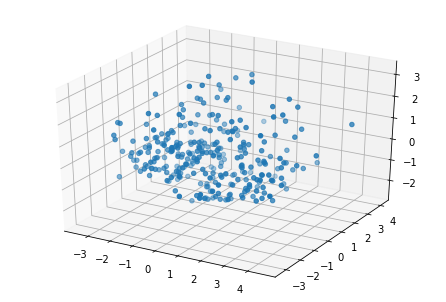

In [28]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

## Clustering

In [29]:
%%time

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sillhoute_scores = []
n_cluster_list = np.arange(2,10).astype(int)

for n_cluster in n_cluster_list:
    kmeans = KMeans(n_clusters=n_cluster)
    cluster_found = kmeans.fit_predict(X)
    sillhoute_scores.append(silhouette_score(X, kmeans.labels_))

CPU times: user 666 ms, sys: 22.2 ms, total: 688 ms
Wall time: 423 ms


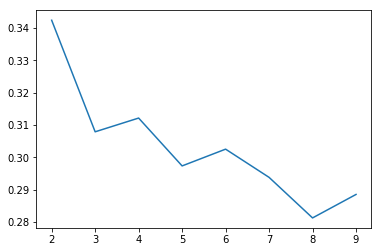

In [30]:
plt.plot(n_cluster_list, sillhoute_scores)

In [31]:
kmeans = KMeans(n_clusters=2)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
C = kmeans.cluster_centers_

Cluster  1
[ 1.91230146 -0.16477173 -0.07073083]
Cluster  2
[-1.15771764  0.0997537   0.04282082]


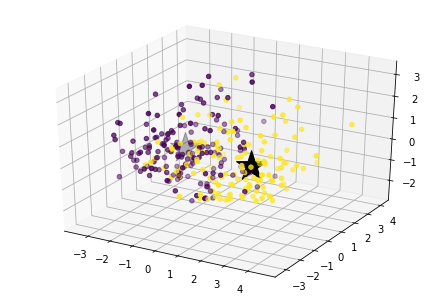

In [32]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2],c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)
counter = 1
for cluster in C:
    print('Cluster ',counter)
    print(cluster)
    counter += 1

In [33]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
cleveland_t1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,temp
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Models

In [35]:
def runModel(dataFrame, modelo):
    
    dataFrame.dropna(inplace=True)
    
    X = dataFrame
    X = dataFrame.drop('temp', axis = 1)
    y = dataFrame['temp']
    
    scaler = StandardScaler()   
    X = scaler.fit_transform(X) 
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)
    
    pca = PCA(n_components=3)
    Xtrain = pca.fit_transform(Xtrain)
    Xtest = pca.fit_transform(Xtest)   

    modelo.fit(Xtrain, ytrain)
    yhat = modelo.predict(Xtest)

    return accuracy_score(ytest, yhat), precision_score(ytest, yhat), r2_score(ytest, yhat),recall_score(ytest, yhat), ytest, yhat, Xtrain, ytrain

In [36]:
def comparaModelos(dataFrame):
    l_accuracy_score, l_precision, l_r2_score, l_recall, _, _, _, _ = runModel(dataFrame, LogisticRegression())
    r_accuracy_score, r_precision, r_r2_score, r_recall, _, _, _, _ = runModel(dataFrame, RandomForestClassifier(n_estimators=100))
    n_accuracy_score, n_precision, n_r2_score, n_recall, _, _, _, _ = runModel(dataFrame, GaussianNB()) 
    d_accuracy_score, d_precision, d_r2_score, d_recall, _, _, _, _ = runModel(dataFrame, DecisionTreeClassifier())
    
    print('LogisticRegression \n Accuracy: %.2f \n Precision: %.2f \n R2 Score: %.2f \n Recall: %.2f \n' %
          ( l_accuracy_score, l_precision, l_r2_score, l_recall ))
    
    print('RandomForestClassifier \n Accuracy: %.2f \n Precision: %.2f \n R2 Score: %.2f \n Recall: %.2f \n' %
          ( r_accuracy_score, r_precision, r_r2_score, r_recall))
    
    print('GaussianNB \n Accuracy: %.2f \n Precision: %.2f \n R2 Score:%.2f \n Recall: %.2f \n' %
          ( n_accuracy_score, n_precision, n_r2_score, n_recall))
    
    print('DecisionTreeClassifier \n Accuracy: %.2f \n Precision: %.2f \n R2 Score: %.2f \n Recall: %.2f \n' %
          ( d_accuracy_score, d_precision, d_r2_score, d_recall))

In [37]:
comparaModelos(cleveland_t1)

LogisticRegression 
 Accuracy: 0.87 
 Precision: 0.93 
 R2 Score: 0.46 
 Recall: 0.76 

RandomForestClassifier 
 Accuracy: 0.85 
 Precision: 0.89 
 R2 Score: 0.40 
 Recall: 0.76 

GaussianNB 
 Accuracy: 0.85 
 Precision: 0.92 
 R2 Score:0.40 
 Recall: 0.73 

DecisionTreeClassifier 
 Accuracy: 0.69 
 Precision: 0.65 
 R2 Score: -0.24 
 Recall: 0.67 



In [38]:
_, _, _, _, l_ytest, l_yhat, _, _, = runModel(cleveland_t1, LogisticRegression())

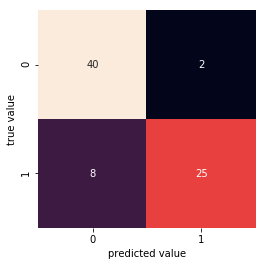

In [39]:
mat = confusion_matrix(l_ytest, l_yhat)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

### GridSearchCV

In [40]:
X2 =cleveland_t1.drop('temp', axis = 1)
y2 = cleveland_t1['temp']
     
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(X2, y2, random_state=42)

In [41]:
lista_c = list(range(1,11))
penalidades = ['l1', 'l2']
paramentros_grid = dict(C=lista_c, penalty = penalidades)

print(paramentros_grid)


{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'penalty': ['l1', 'l2']}


In [42]:
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()
grid = GridSearchCV(lr, paramentros_grid, cv=10 ,scoring= 'recall')

In [43]:
grid.fit(Xtrain2, ytrain2)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [44]:
grid.predict(Xtest2)

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1])

In [45]:
grid.best_params_

{'C': 4, 'penalty': 'l1'}

In [46]:
lr2 = LogisticRegression(C=4, penalty='l1' )
lr2.fit(Xtrain2, ytrain2)
yhat2 = lr2.predict(Xtest2)

In [47]:
print("Accuracy:", accuracy_score(ytest2, yhat2))
print("Precision:", precision_score(ytest2, yhat2))
print("Recall:", recall_score(ytest2, yhat2))

Accuracy: 0.8933333333333333
Precision: 0.8787878787878788
Recall: 0.8787878787878788


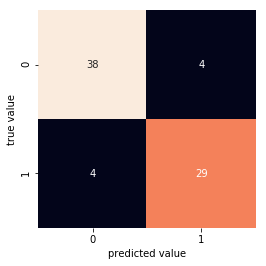

In [48]:
mat = confusion_matrix(ytest2, yhat2)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');